Parkinsons_Disease_Prediction

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Importing_Libraries

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt 

Data Preprocessing and Cleaning

In [3]:
df=pd.read_csv("parkinsons.data")
df.head()
df_new=df
df_new=df_new.drop(columns='name',axis=1)
print(df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

EDA

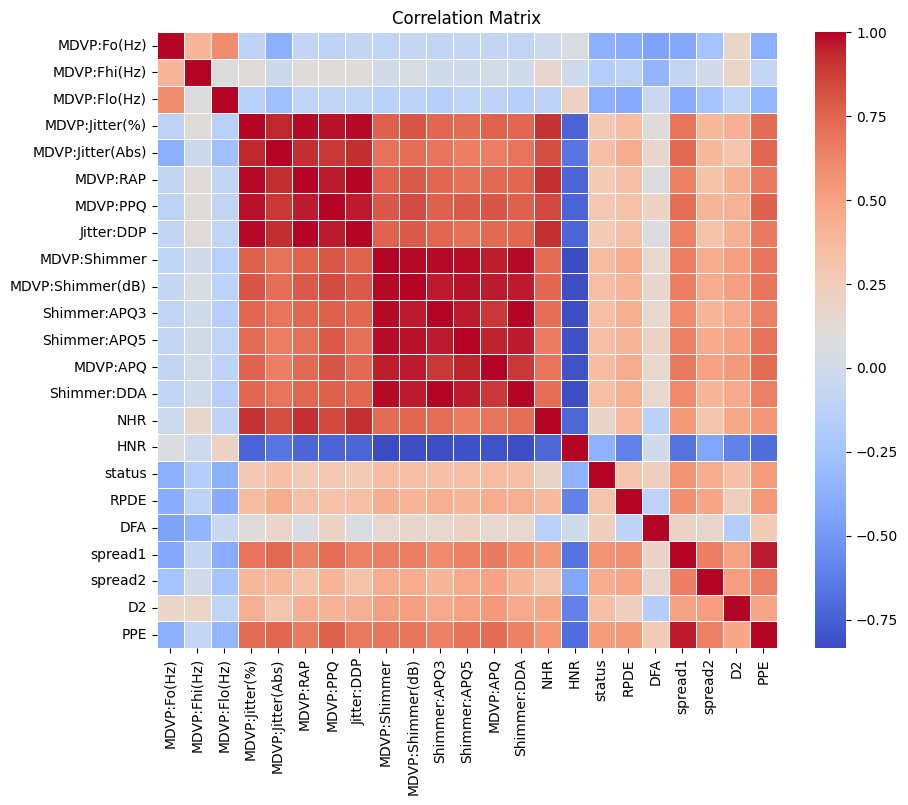

In [4]:
corr = df_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.7)
plt.title("Correlation Matrix")
plt.savefig('Correltn_matrix.png')
plt.show()

In [5]:
corr_matrix = df_new.corr()
species_corr = corr_matrix['status'].drop('status')
top_5_abs_corr = species_corr.abs().sort_values(ascending=False).head(5)
top_5_corr = species_corr[top_5_abs_corr.index]
print("Top 5 features with highest absolute correlation with 'species':")
print(top_5_corr)

Top 5 features with highest absolute correlation with 'species':
spread1         0.564838
PPE             0.531039
spread2         0.454842
MDVP:Fo(Hz)    -0.383535
MDVP:Flo(Hz)   -0.380200
Name: status, dtype: float64


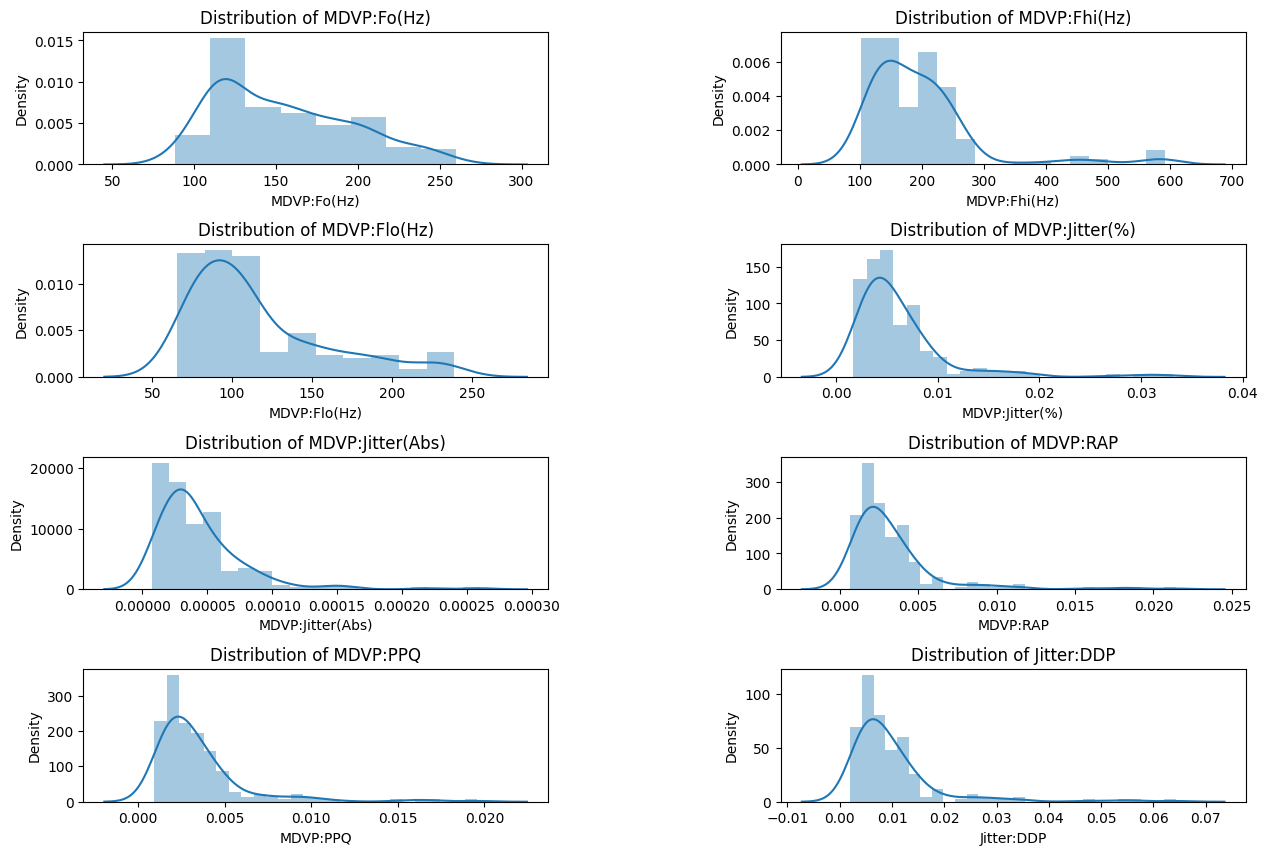

In [6]:
pfig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.6)  # Adjust space between subplots

# Plot distplots for the first three columns in the first row
for i, column in enumerate(df_new.columns[:-1][:2]):
    sns.distplot(df_new[column], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution of {column}')

# Plot distplots for the next three columns in the second row
for i, column in enumerate(df_new.columns[:-1][2:4]):
    sns.distplot(df_new[column], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'Distribution of {column}')
    
for i, column in enumerate(df_new.columns[:-1][4:6]):
    sns.distplot(df_new[column], kde=True, ax=axes[2, i])
    axes[2, i].set_title(f'Distribution of {column}')
    
for i, column in enumerate(df_new.columns[:-1][6:8]):
    sns.distplot(df_new[column], kde=True, ax=axes[3, i])
    axes[3, i].set_title(f'Distribution of {column}')

# Display the plot
plt.show()

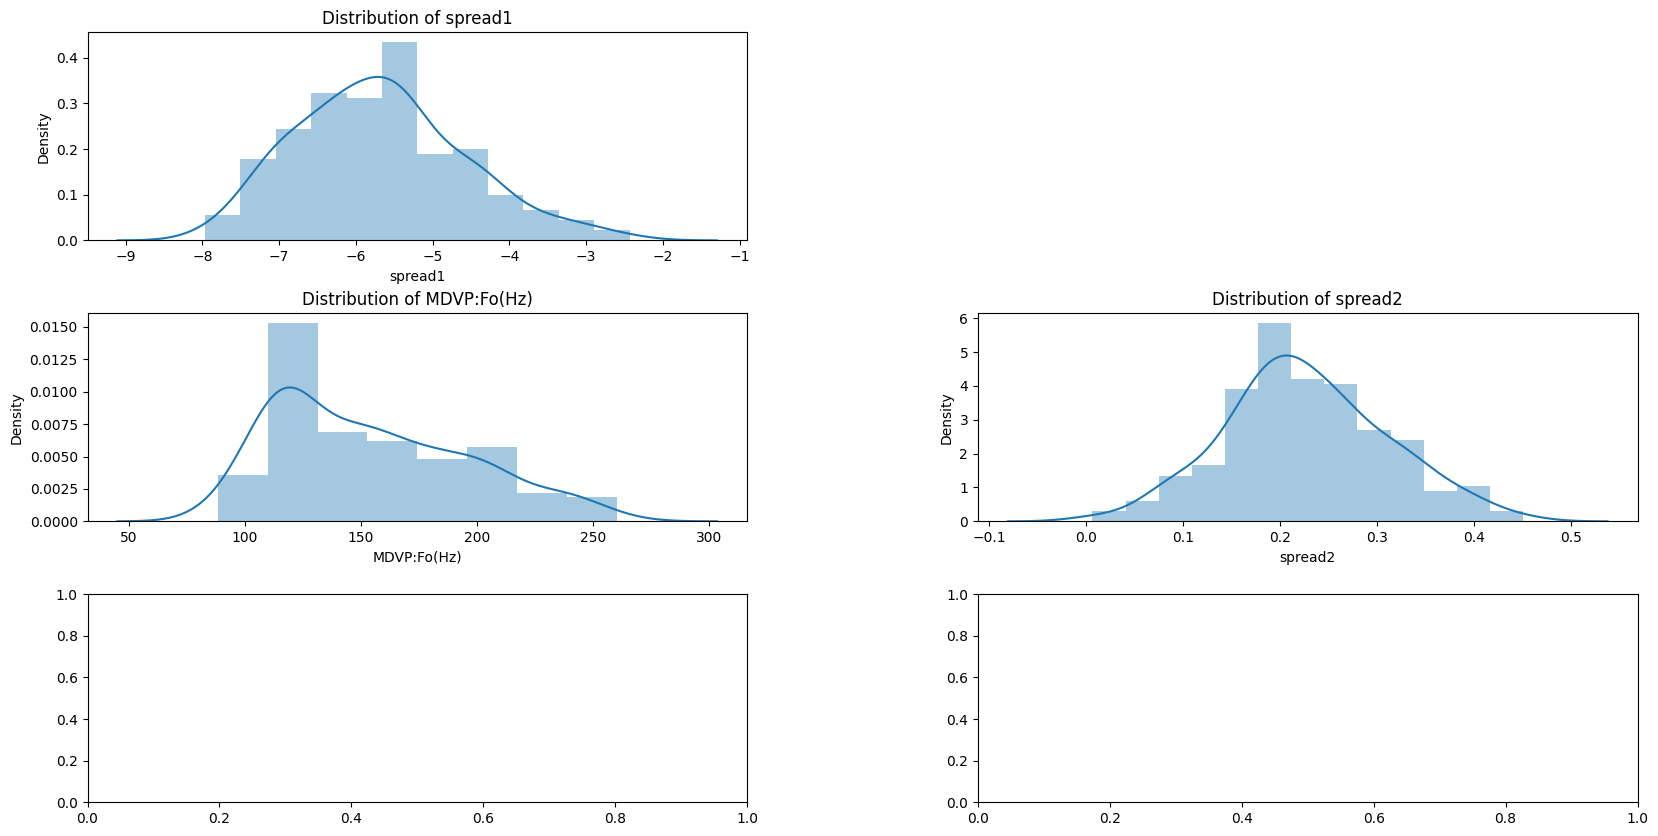

In [7]:
df_new2=df[['spread1','PPE','spread2','MDVP:Fo(Hz)','MDVP:Flo(Hz)','status']]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
plt.subplots_adjust(wspace=0.35, hspace=0.35)  # Adjust space between subplots
colors={'healthy': 'blue', 'Affected': 'orange'}
# Plot distplots for the first row (first three columns)
for i in range(2):
    sns.distplot(df_new2.iloc[:, i],kde=True,ax=axes[0, i])
    axes[0, i].set_title(f'Distribution of {df_new2.columns[i]}')

# Plot distplots for the second row (next two columns)
for i in range(2, 4):
    sns.distplot(df_new2.iloc[:, i], kde=True, ax=axes[1, i - 3])
    axes[1, i - 3].set_title(f'Distribution of {df_new2.columns[i]}')

# Hide the empty subplot in the bottom right corner
fig.delaxes(axes[0,1])
plt.savefig('Distplot.png')
# Display the plot
plt.show()
    

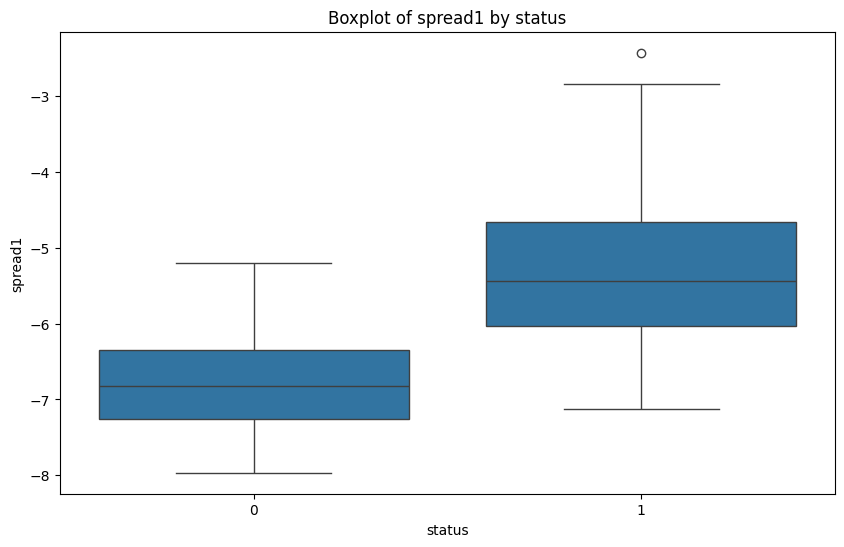

<Figure size 1200x600 with 0 Axes>

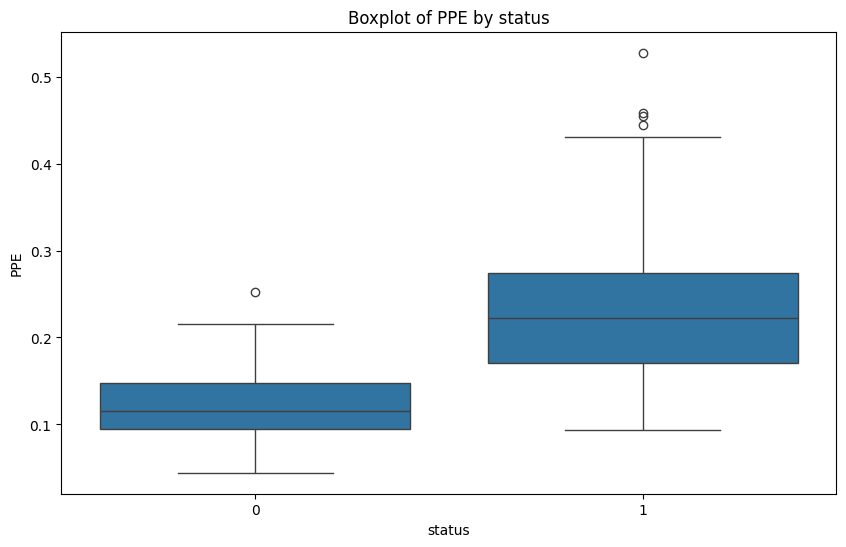

<Figure size 1200x600 with 0 Axes>

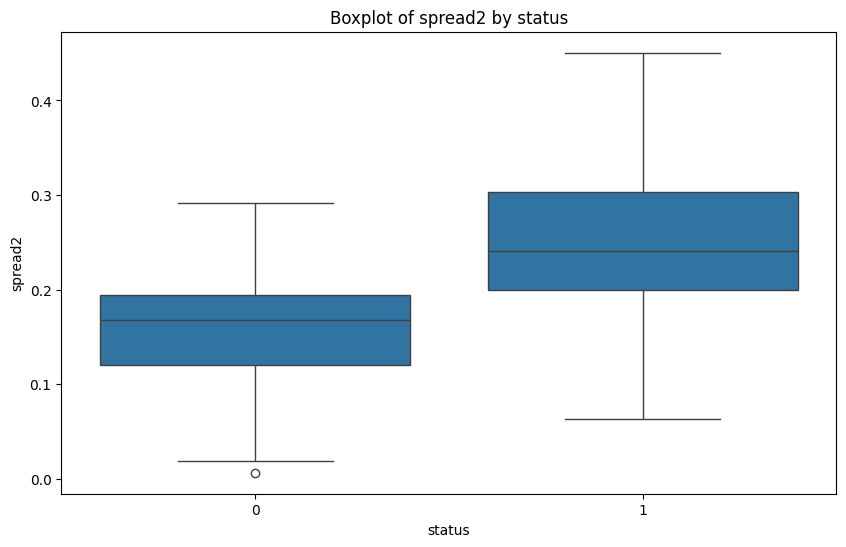

<Figure size 1200x600 with 0 Axes>

In [8]:
features=['spread1','PPE','spread2']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='status', y=feature, data=df_new)
    plt.title(f"Boxplot of {feature} by status")
    plt.savefig(f'{feature}')
    plt.show()
    plt.figure(figsize=(12, 6))


In [9]:
df.shape

(195, 24)

In [10]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [11]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [13]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [14]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

Train_Test_Split

In [15]:
X=df.drop(columns=['name','status'],axis=1).values
df_new=df.drop(columns=['name','status'],axis=1)
Y=df['status'].values
X=preprocessing.StandardScaler().fit_transform(X)

In [16]:
X[0:1]

array([[-0.82929965, -0.43616456, -0.95203729,  0.33491386,  0.74975946,
         0.13296255,  0.76080023,  0.13175532,  0.74598495,  0.73953578,
         0.60785907,  1.11914677,  0.33298451,  0.60753214, -0.06789281,
        -0.19322537, -0.8078385 ,  1.76081412,  0.80132308,  0.48047686,
        -0.21053082,  0.86888575]])

In [17]:
Y=df['status'].values
Y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("Size of Test datasets:X and Y",X_test.shape,y_test.shape)
print("Size of Test datasets:X and Y",X_train.shape,y_train.shape)

Size of Test datasets:X and Y (39, 22) (39,)
Size of Test datasets:X and Y (156, 22) (156,)


In [ ]:
KNN= KNeighborsClassifier(n_neighbors=5)
Tree= DecisionTreeClassifier(criterion='entropy')
LR= LogisticRegression(solver='liblinear')
SVM= svm.SVC(kernel='rbf')
models=[KNN,Tree,LR,SVM]
models = [
    LogisticRegression(solver='liblinear'),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(criterion='entropy'),
    svm.SVC(kernel='rbf')
]

# Define cross-validation method (e.g., KFold with 5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each model
for model in models:
    # Print the model details
    print(model)
    
    # Perform cross-validation on the training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {cv_scores.mean()}")

    # Fit the model on the training data
    model.fit(X_train, y_train)
    y_pred_prob=model.predict_proba(X_test)
    # Evaluate model performance on test data
    y_pred = model.predict(X_test)
    print("Test set evaluation:")
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    print("Log Loss:", log_loss(y_test, y_pred_prob))
    print("Jaccard score:", jaccard_score(y_test, y_pred, average='weighted'))  # Adjust average as needed
    print("F1 score:", f1_score(y_test, y_pred, average='weighted'))  # Adjust average as needed
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")
    

Neural_Networks

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
from sklearn.model_selection import cross_val_predict
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Cross-Validation Mean Score: {np.mean(cv_scores)}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# If you want to see cross-validated predictions on the training data
y_train_pred_cv = cross_val_predict(rf_classifier, X_train, y_train, cv=5)
print(f'Cross-Validated Training Accuracy: {accuracy_score(y_train, y_train_pred_cv)}')

Cross-Validation Scores: [0.96875    0.90322581 0.90322581 0.90322581 0.83870968]
Cross-Validation Mean Score: 0.9034274193548388
Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Cross-Validated Training Accuracy: 0.9038461538461539


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4768 - loss: 4.6469 - val_accuracy: 0.6154 - val_loss: 3.9763 - learning_rate: 0.0010
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6129 - loss: 4.1945 - val_accuracy: 0.7179 - val_loss: 3.8828 - learning_rate: 0.0010
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5567 - loss: 4.3557 - val_accuracy: 0.8205 - val_loss: 3.7854 - learning_rate: 0.0010
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6264 - loss: 4.0239 - val_accuracy: 0.7949 - val_loss: 3.6923 - learning_rate: 0.0010
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6263 - loss: 4.0394 - val_accuracy: 0.8462 - val_loss: 3.6100 - learning_rate: 0.0010
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7533 - loss: 3.7577 - val_accuracy: 0.8718 - val_loss: 3.5360 - learning_rate: 0.0010
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6911 - loss: 3.6792 - val_ac

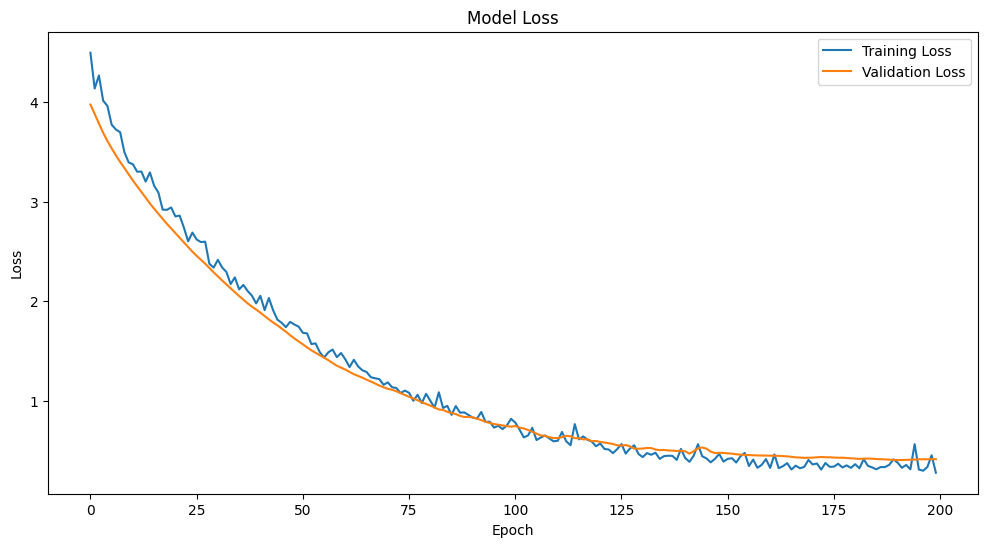

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.02), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    Dropout(0.6),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001)

history = model.fit(X_train, y_train, 
                    epochs=200, 
                    batch_size=16, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
y_pred_prob = model.predict(X_test)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('Train_vs_Validation.png')
plt.show()
